In [1]:
#LSTM statistical information

import pandas as pd

# Load the CSV files with low_memory=False
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Inspect the column names
print(emailspam_df.columns)
print(enron_df.columns)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Print classification classes and number of cases for each
class_counts = combined_df['Category'].value_counts()
print("Classification Classes and Number of Cases:")
print(class_counts)

# Print features used in the model and their description
features = combined_df.columns.tolist()
print("\nFeatures Used in the Model and Their Description:")
print("Features:", features)
print("Description: The primary feature used is the 'Message' column which contains the text of the emails.")

# For each feature, list possible values (if categorical) and their frequencies
print("\nPossible Values and Their Frequencies:")
for column in combined_df.columns:
    if combined_df[column].dtype == 'object':
        value_counts = combined_df[column].value_counts()
        print(f"\nColumn: {column}")
        print(value_counts)

# Calculate Mean, STD, Min, Median, Max for the 'Message_Length' feature
combined_df['Message_Length'] = combined_df['Message'].str.len()

message_length_stats = combined_df['Message_Length'].describe()
print("\nMessage Length Statistics:")
print(message_length_stats)

# Additionally, calculate and print Mean, STD, Min, Median, Max
mean_length = combined_df['Message_Length'].mean()
std_length = combined_df['Message_Length'].std()
min_length = combined_df['Message_Length'].min()
median_length = combined_df['Message_Length'].median()
max_length = combined_df['Message_Length'].max()

print("\nDetailed Message Length Statistics:")
print(f"Mean: {mean_length}")
print(f"STD: {std_length}")
print(f"Min: {min_length}")
print(f"Median: {median_length}")
print(f"Max: {max_length}")



Index(['Subject', 'content', 'Category', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 735', 'Unnamed: 736', 'Unnamed: 737', 'Unnamed: 738',
       'Unnamed: 739', 'Unnamed: 740', 'Unnamed: 741', 'Unnamed: 742',
       'Unnamed: 743', 'Unnamed: 744'],
      dtype='object', length=745)
Index(['Category', 'Message'], dtype='object')
Classification Classes and Number of Cases:
Category
ham     16948
spam      913
Name: count, dtype: int64

Features Used in the Model and Their Description:
Features: ['Subject', 'Message', 'Category', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed:

Class distribution:
Category
ham     16948
spam      913
Name: count, dtype: int64


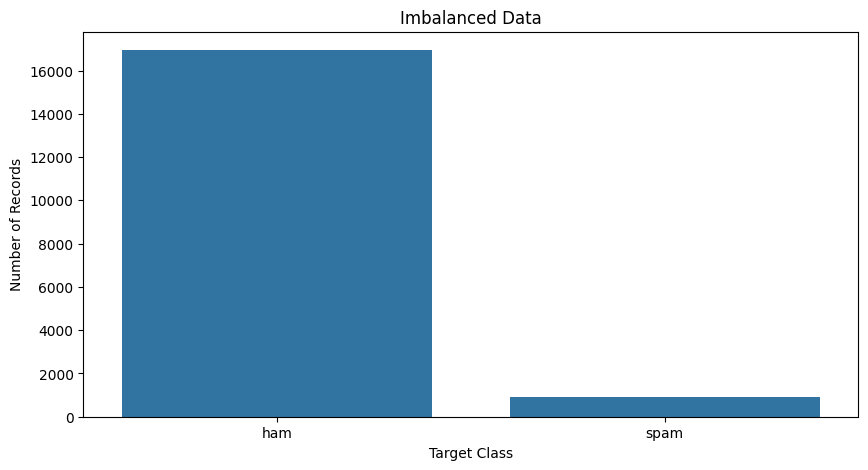

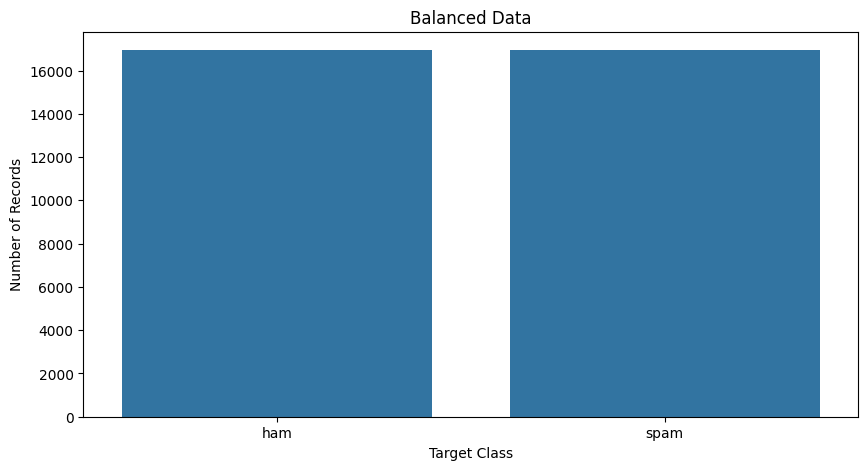

Training set distribution: [13558 13558]
Test set distribution: [3390 3390]
Epoch 1/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.6371 - loss: 0.6287 - val_accuracy: 0.7887 - val_loss: 0.4874
Epoch 2/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8323 - loss: 0.3835 - val_accuracy: 0.9482 - val_loss: 0.1508
Epoch 3/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.9712 - loss: 0.0911 - val_accuracy: 0.9635 - val_loss: 0.1067
Epoch 4/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.9843 - loss: 0.0547 - val_accuracy: 0.9696 - val_loss: 0.0972
Epoch 5/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.9931 - loss: 0.0245 - val_accuracy: 0.9683 - val_loss: 0.1149
Epoch 6/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.9930 - loss: 0.0217 - val_accuracy: 0.9620 - val_loss: 0.1510
Epoch 7/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.9950 - loss: 0.0186 - val_accuracy: 0.9677 - val_loss: 0.1050
Epoch 8/10
678

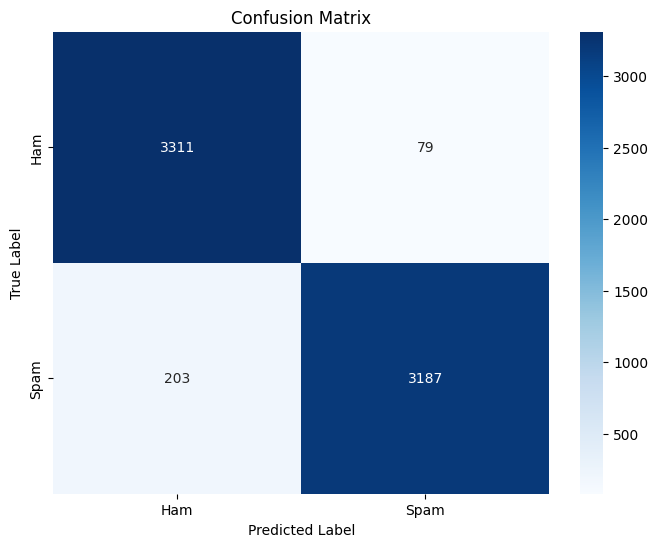

LSTM Model Parameters:
Embedding Dimension: 50
Max Length: 100
LSTM Units 1: 128
LSTM Units 2: 64
Dropout Rate: 0.2
Optimizer: Adam
Loss: Binary Crossentropy
Batch Size: 32
Epochs: 10

Accuracy: 0.9584070796460177
Precision: 0.975811390079608
Recall: 0.940117994100295
Confusion Matrix:
 [[3311   79]
 [ 203 3187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      3390
           1       0.98      0.94      0.96      3390

    accuracy                           0.96      6780
   macro avg       0.96      0.96      0.96      6780
weighted avg       0.96      0.96      0.96      6780



In [2]:
#LSTM Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the cleaned email spam dataset
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Check class distribution
class_counts = combined_df['Category'].value_counts()
print("Class distribution:")
print(class_counts)

# Plot class distribution for imbalanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=combined_df)
plt.title('Imbalanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Define the parameters for tokenization and padding
max_words = 10000
max_len = 100

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['Message'])
sequences = tokenizer.texts_to_sequences(combined_df['Message'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Prepare the labels
labels = combined_df['Category'].apply(lambda x: 1 if x == 'spam' else 0).values

# Oversample the minority class using SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(padded_sequences, labels)

# Convert oversampled labels back to DataFrame for plotting
resampled_df = pd.DataFrame({'Category': y_res})
resampled_df['Category'] = resampled_df['Category'].apply(lambda x: 'spam' if x == 1 else 'ham')

# Plot class distribution for balanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=resampled_df)
plt.title('Balanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# Check distribution in the train/test sets
print("Training set distribution:", np.bincount(y_train))
print("Test set distribution:", np.bincount(y_test))

# Build the LSTM model
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=50),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with oversampled data
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model_lstm.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the results
print("LSTM Model Parameters:")
print(f"Embedding Dimension: {50}")
print(f"Max Length: {max_len}")
print(f"LSTM Units 1: 128")
print(f"LSTM Units 2: 64")
print(f"Dropout Rate: 0.2")
print(f"Optimizer: Adam")
print(f"Loss: Binary Crossentropy")
print(f"Batch Size: 32")
print(f"Epochs: 10")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


In [3]:
#CNN statistical information

import pandas as pd

# Load the CSV files with low_memory=False
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Inspect the column names
print("Email Spam Dataset Columns:", emailspam_df.columns)
print("Enron Dataset Columns:", enron_df.columns)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Print classification classes and number of cases for each
class_counts = combined_df['Category'].value_counts()
print("Classification Classes and Number of Cases:")
print(class_counts)

# Print features used in the model and their description
features = combined_df.columns.tolist()
print("\nFeatures Used in the Model and Their Description:")
print("Features:", features)
print("Description: The primary feature used is the 'Message' column which contains the text of the emails.")

# For each feature, list possible values (if categorical) and their frequencies
print("\nPossible Values and Their Frequencies:")
for column in combined_df.columns:
    if combined_df[column].dtype == 'object':
        value_counts = combined_df[column].value_counts()
        print(f"\nColumn: {column}")
        print(value_counts)

# Calculate Mean, STD, Min, Median, Max for the 'Message_Length' feature
combined_df['Message_Length'] = combined_df['Message'].str.len()

message_length_stats = combined_df['Message_Length'].describe()
print("\nMessage Length Statistics:")
print(message_length_stats)

# Additionally, calculate and print Mean, STD, Min, Median, Max
mean_length = combined_df['Message_Length'].mean()
std_length = combined_df['Message_Length'].std()
min_length = combined_df['Message_Length'].min()
median_length = combined_df['Message_Length'].median()
max_length = combined_df['Message_Length'].max()

print("\nDetailed Message Length Statistics:")
print(f"Mean: {mean_length}")
print(f"STD: {std_length}")
print(f"Min: {min_length}")
print(f"Median: {median_length}")
print(f"Max: {max_length}")



Email Spam Dataset Columns: Index(['Subject', 'content', 'Category', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 735', 'Unnamed: 736', 'Unnamed: 737', 'Unnamed: 738',
       'Unnamed: 739', 'Unnamed: 740', 'Unnamed: 741', 'Unnamed: 742',
       'Unnamed: 743', 'Unnamed: 744'],
      dtype='object', length=745)
Enron Dataset Columns: Index(['Category', 'Message'], dtype='object')
Classification Classes and Number of Cases:
Category
ham     16948
spam      913
Name: count, dtype: int64

Features Used in the Model and Their Description:
Features: ['Subject', 'Message', 'Category', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Un

Class distribution:
Category
ham     16948
spam      913
Name: count, dtype: int64


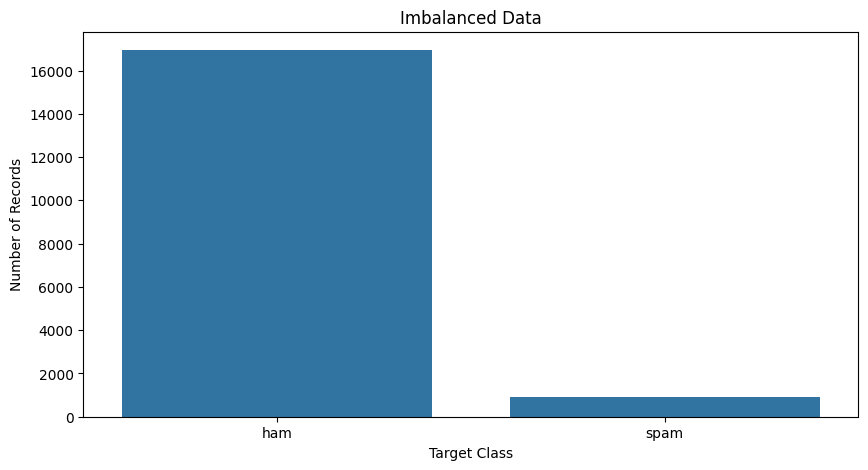

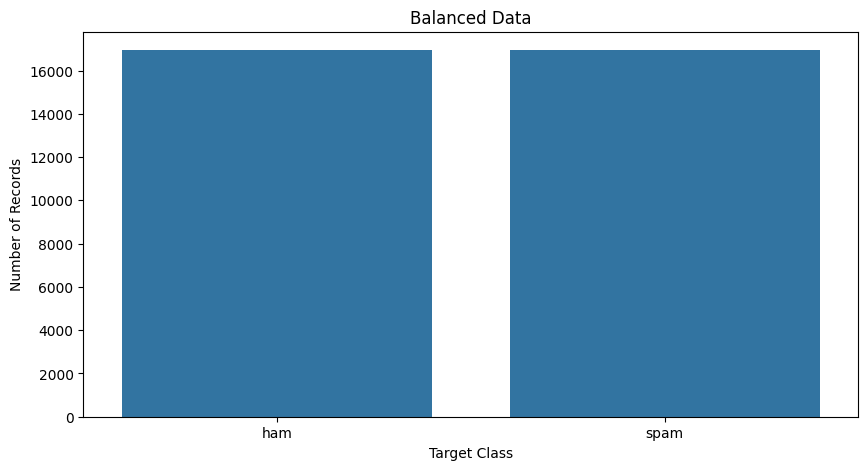

Training set distribution: [13558 13558]
Test set distribution: [3390 3390]
Epoch 1/10


c:\Users\abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8429 - loss: 0.3472 - val_accuracy: 0.9609 - val_loss: 0.1061
Epoch 2/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9812 - loss: 0.0615 - val_accuracy: 0.9611 - val_loss: 0.1060
Epoch 3/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9937 - loss: 0.0204 - val_accuracy: 0.9679 - val_loss: 0.1040
Epoch 4/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9950 - loss: 0.0125 - val_accuracy: 0.9628 - val_loss: 0.1324
Epoch 5/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9958 - loss: 0.0109 - val_accuracy: 0.9648 - val_loss: 0.1289
Epoch 6/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9957 - loss: 0.0092 - val_accuracy: 0.9626 - val_loss: 0.1802
Epoch 7/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9966 - loss: 0.0071 - val_accuracy: 0.9635 - val_loss: 0.1413
Epoch 8/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9975 - loss: 0.0061 - val_accuracy: 0.9676 - val_

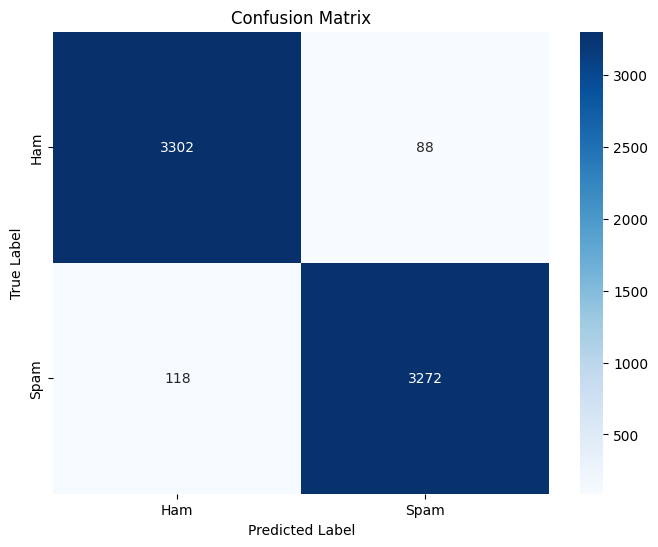

CNN Model Parameters:
Embedding Dimension: 50
Max Length: 100
Convolutional Filters: 128
Convolutional Kernel Size: 5
Pooling Size: 2
Dropout Rate: 0.2
Dense Units: 64
Optimizer: Adam
Loss: Binary Crossentropy
Batch Size: 32
Epochs: 10

Accuracy: 0.9696165191740413
Precision: 0.9738095238095238
Recall: 0.9651917404129794
Confusion Matrix:
 [[3302   88]
 [ 118 3272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3390
           1       0.97      0.97      0.97      3390

    accuracy                           0.97      6780
   macro avg       0.97      0.97      0.97      6780
weighted avg       0.97      0.97      0.97      6780



In [9]:
#CNN Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the cleaned email spam dataset
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Check class distribution
class_counts = combined_df['Category'].value_counts()
print("Class distribution:")
print(class_counts)

# Plot class distribution for imbalanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=combined_df)
plt.title('Imbalanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Define the parameters for tokenization and padding
max_words = 10000
max_len = 100
embedding_dim = 50

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['Message'])
sequences = tokenizer.texts_to_sequences(combined_df['Message'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Prepare the labels
labels = combined_df['Category'].apply(lambda x: 1 if x == 'spam' else 0).values

# Oversample the minority class using SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(padded_sequences, labels)

# Convert oversampled labels back to DataFrame for plotting
resampled_df = pd.DataFrame({'Category': y_res})
resampled_df['Category'] = resampled_df['Category'].apply(lambda x: 'spam' if x == 1 else 'ham')

# Plot class distribution for balanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=resampled_df)
plt.title('Balanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# Check distribution in the train/test sets
print("Training set distribution:", np.bincount(y_train))
print("Test set distribution:", np.bincount(y_test))

# Build the CNN model
model_cnn = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with oversampled data
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the results
print("CNN Model Parameters:")
print(f"Embedding Dimension: {embedding_dim}")
print(f"Max Length: {max_len}")
print(f"Convolutional Filters: 128")
print(f"Convolutional Kernel Size: 5")
print(f"Pooling Size: 2")
print(f"Dropout Rate: 0.2")
print(f"Dense Units: 64")
print(f"Optimizer: Adam")
print(f"Loss: Binary Crossentropy")
print(f"Batch Size: 32")
print(f"Epochs: 10")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


In [5]:
#hybrid statistical information

import pandas as pd

# Load the CSV files with low_memory=False
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Inspect the column names
print("Email Spam Dataset Columns:", emailspam_df.columns)
print("Enron Dataset Columns:", enron_df.columns)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Print classification classes and number of cases for each
class_counts = combined_df['Category'].value_counts()
print("Classification Classes and Number of Cases:")
print(class_counts)

# Print features used in the model and their description
features = combined_df.columns.tolist()
print("\nFeatures Used in the Model and Their Description:")
print("Features:", features)
print("Description: The primary feature used is the 'Message' column which contains the text of the emails.")

# For each feature, list possible values (if categorical) and their frequencies
print("\nPossible Values and Their Frequencies:")
for column in combined_df.columns:
    if combined_df[column].dtype == 'object':
        value_counts = combined_df[column].value_counts()
        print(f"\nColumn: {column}")
        print(value_counts)

# Calculate Mean, STD, Min, Median, Max for the 'Message_Length' feature
combined_df['Message_Length'] = combined_df['Message'].str.len()

message_length_stats = combined_df['Message_Length'].describe()
print("\nMessage Length Statistics:")
print(message_length_stats)

# Additionally, calculate and print Mean, STD, Min, Median, Max
mean_length = combined_df['Message_Length'].mean()
std_length = combined_df['Message_Length'].std()
min_length = combined_df['Message_Length'].min()
median_length = combined_df['Message_Length'].median()
max_length = combined_df['Message_Length'].max()

print("\nDetailed Message Length Statistics:")
print(f"Mean: {mean_length}")
print(f"STD: {std_length}")
print(f"Min: {min_length}")
print(f"Median: {median_length}")
print(f"Max: {max_length}")


Email Spam Dataset Columns: Index(['Subject', 'content', 'Category', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 735', 'Unnamed: 736', 'Unnamed: 737', 'Unnamed: 738',
       'Unnamed: 739', 'Unnamed: 740', 'Unnamed: 741', 'Unnamed: 742',
       'Unnamed: 743', 'Unnamed: 744'],
      dtype='object', length=745)
Enron Dataset Columns: Index(['Category', 'Message'], dtype='object')
Classification Classes and Number of Cases:
Category
ham     16948
spam      913
Name: count, dtype: int64

Features Used in the Model and Their Description:
Features: ['Subject', 'Message', 'Category', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Un

Class distribution:
Category
ham     16948
spam      913
Name: count, dtype: int64


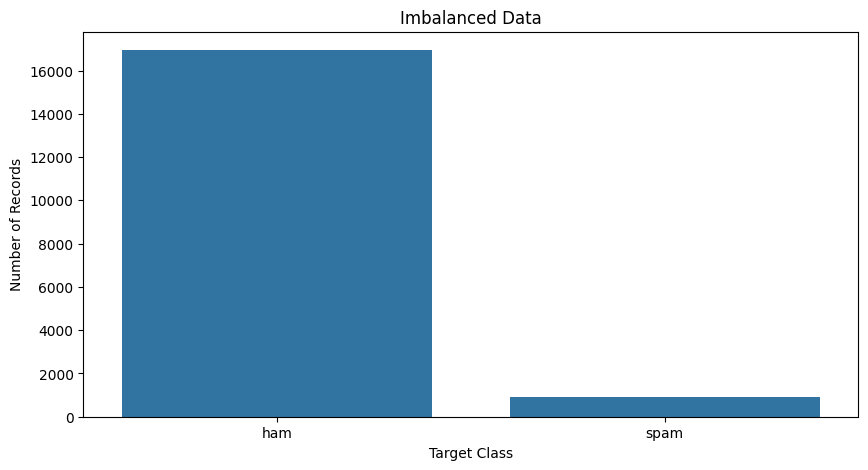

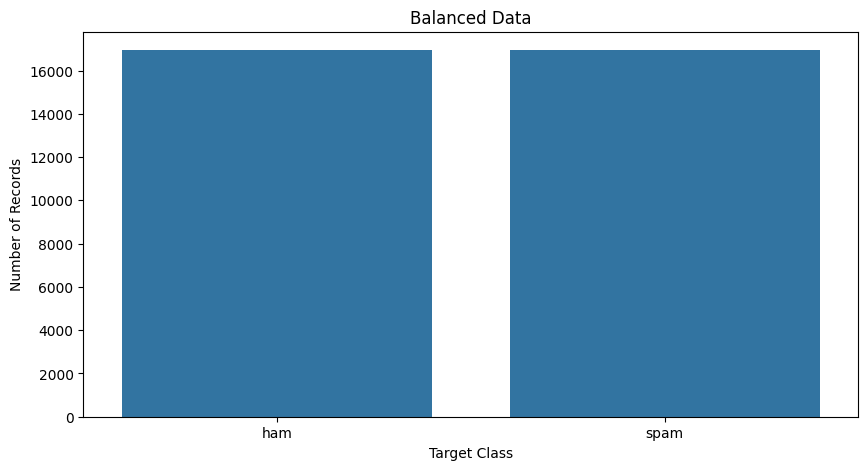

Training set distribution: [13558 13558]
Test set distribution: [3390 3390]
Epoch 1/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6558 - loss: 0.6183 - val_accuracy: 0.7719 - val_loss: 0.4776
Epoch 2/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8593 - loss: 0.3453 - val_accuracy: 0.9447 - val_loss: 0.1542
Epoch 3/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9647 - loss: 0.1165 - val_accuracy: 0.9607 - val_loss: 0.1151
Epoch 4/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9833 - loss: 0.0624 - val_accuracy: 0.9559 - val_loss: 0.1622
Epoch 5/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9886 - loss: 0.0423 - val_accuracy: 0.9640 - val_loss: 0.1450
Epoch 6/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9561 - val_loss: 0.1550
Epoch 7/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9903 - loss: 0.0323 - val_accuracy: 0.9646 - val_loss: 0.1353
Epoch 8/10
678

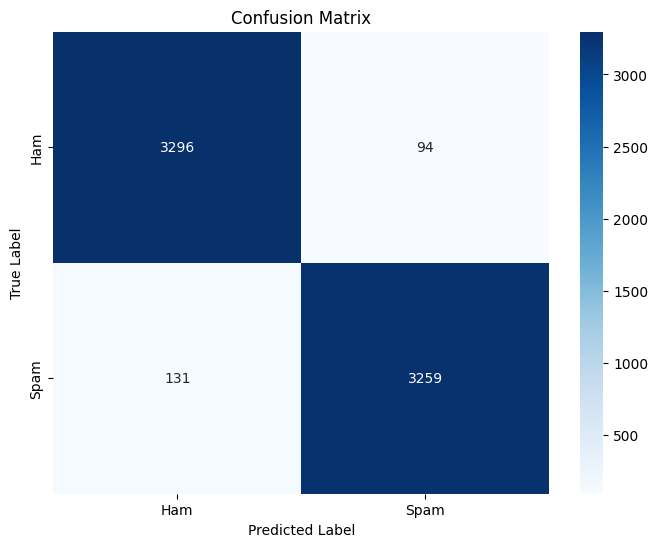

Hybrid Model Parameters:
Embedding Dimension: 50
Max Length: 100
Convolutional Filters: 128
Convolutional Kernel Size: 5
Pooling Size: 2
LSTM Units 1: 128
LSTM Units 2: 64
Dropout Rate: 0.2
Dense Units: 64
Optimizer: Adam
Loss: Binary Crossentropy
Batch Size: 32
Epochs: 10

Accuracy: 0.9668141592920354
Precision: 0.9719654041157173
Recall: 0.9613569321533924
Confusion Matrix:
 [[3296   94]
 [ 131 3259]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3390
           1       0.97      0.96      0.97      3390

    accuracy                           0.97      6780
   macro avg       0.97      0.97      0.97      6780
weighted avg       0.97      0.97      0.97      6780



In [6]:
#hybrid Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the cleaned email spam dataset
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Check class distribution
class_counts = combined_df['Category'].value_counts()
print("Class distribution:")
print(class_counts)

# Plot class distribution for imbalanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=combined_df)
plt.title('Imbalanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Define the parameters for tokenization and padding
max_words = 10000
max_len = 100
embedding_dim = 50

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['Message'])
sequences = tokenizer.texts_to_sequences(combined_df['Message'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Prepare the labels
labels = combined_df['Category'].apply(lambda x: 1 if x == 'spam' else 0).values

# Oversample the minority class using SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(padded_sequences, labels)

# Convert oversampled labels back to DataFrame for plotting
resampled_df = pd.DataFrame({'Category': y_res})
resampled_df['Category'] = resampled_df['Category'].apply(lambda x: 'spam' if x == 1 else 'ham')

# Plot class distribution for balanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=resampled_df)
plt.title('Balanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# Check distribution in the train/test sets
print("Training set distribution:", np.bincount(y_train))
print("Test set distribution:", np.bincount(y_test))

# Build the Hybrid LSTM-CNN model
model_hybrid = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with oversampled data
history_hybrid = model_hybrid.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model_hybrid.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the results
print("Hybrid Model Parameters:")
print(f"Embedding Dimension: {embedding_dim}")
print(f"Max Length: {max_len}")
print(f"Convolutional Filters: 128")
print(f"Convolutional Kernel Size: 5")
print(f"Pooling Size: 2")
print(f"LSTM Units 1: 128")
print(f"LSTM Units 2: 64")
print(f"Dropout Rate: 0.2")
print(f"Dense Units: 64")
print(f"Optimizer: Adam")
print(f"Loss: Binary Crossentropy")
print(f"Batch Size: 32")
print(f"Epochs: 10")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


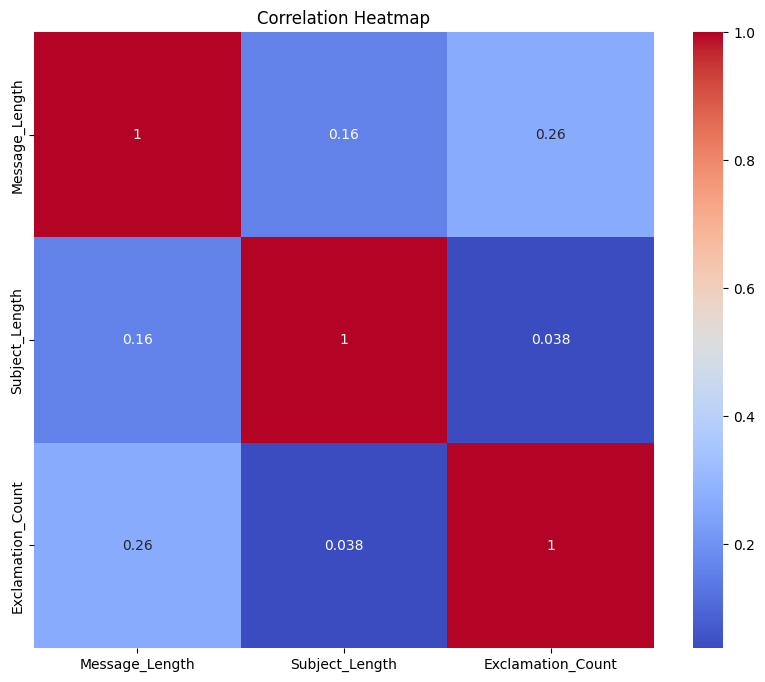

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Feature Engineering: Calculate message length, subject length, and exclamation count
combined_df['Message_Length'] = combined_df['Message'].str.len()
combined_df['Subject_Length'] = combined_df['Subject'].str.len()
combined_df['Exclamation_Count'] = combined_df['Message'].apply(lambda x: x.count('!'))

# Calculate correlations
corr = combined_df[['Message_Length', 'Subject_Length', 'Exclamation_Count']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


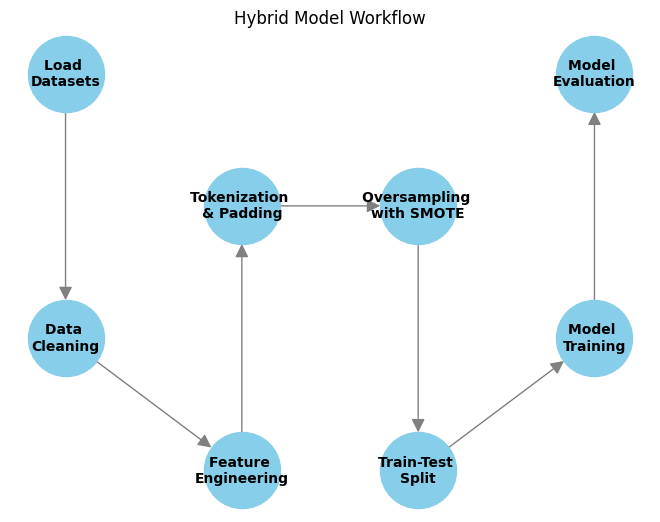

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each step in the workflow
G.add_node('A', label='Load \nDatasets')
G.add_node('B', label='Data \nCleaning')
G.add_node('C', label='Feature \nEngineering')
G.add_node('D', label='Tokenization \n& Padding')
G.add_node('E', label='Oversampling \nwith SMOTE')
G.add_node('F', label='Train-Test \nSplit')
G.add_node('G', label='Model \nTraining')
G.add_node('H', label='Model \nEvaluation')

# Add edges to represent the workflow
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H')])

# Define positions for all nodes
pos = {
    'A': (0, 1),
    'B': (0, .5),
    'C': (3, 0.25),
    'D': (3,.75),
    'E': (6, .75),
    'F': (6,0.25),
    'G': (9,0.5),
    'H': (9,1)
}

# Draw the graph with specific node positions
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', arrowsize=20)

# Display the graph
plt.title("Hybrid Model Workflow")
plt.show()
